In [1]:
%matplotlib inline
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

In [2]:
#
# Model description
# state vector x = [A, V] = [Protein number, Cell volume]
#
ks = 1
ki = 1
mu = 1
def model_eq(time, x):
    A = x[0]
    V = x[1]
    f = np.zeros((2,))
    f[0] = ks * V - ki * A
    f[1] = mu
    return f

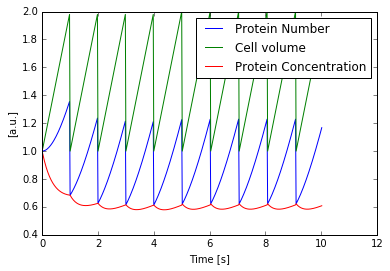

In [3]:
#
# Numetical integration.
#
t0 = 0
tf = 10
dt = 0.02
V0 = 1# initial cell volume
Vdiv = V0 * 2# cell volume at cell division
xinit = [1, V0]# initial state vector

solver = integrate.ode(model_eq)
solver.set_integrator('dopri5')# corresponding to MATLAB ode45 function
solver.set_initial_value(xinit, t0)
time_points = []
record = []
while solver.successful() and solver.t < tf:
    solver.integrate(solver.t + dt)# Compute the single step of ODE
    if solver.y[1] > Vdiv:# cell division when the volume reach the threshold
        solver.set_initial_value([0.5 * solver.y[0], V0], solver.t)# A -> A/2 and V -> V0
    record.append(solver.y)
    time_points.append(solver.t)

record = np.array(record)
time_points = np.array(time_points)
#
# Plot simulation result
#
plt.plot(time_points, record[:, 0], label='Protein Number')
plt.plot(time_points, record[:, 1], label='Cell volume')
plt.plot(time_points, np.divide(record[:, 0], record[:, 1]), label='Protein Concentration')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('[a.u.]')
plt.show()